# 데이터 불러오기

In [81]:
import pandas as pd

ddata = pd.read_csv("ddata.wst.txt", encoding="euc-kr", sep="\t", names=["num","speaker","contents","tags"])
mdata = pd.read_csv("mdata.wst.txt", encoding="euc-kr", sep="\t", names=["id","part","category","exptype","exp"])

ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴_까 요,INTRO
1,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,NaN
2,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천_해 드릴_게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,NaN
4,4,<US>,이 옷 에 어울리 는 치마 로 추천_해 주 세 요,USER_SUCCESS


In [82]:
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


In [83]:
ddata = ddata.fillna("")

In [84]:
print(len(ddata), len(mdata))

154662 64632


# 1. "_" 제거하기

## (1) for문 이용하기 (너무 오래걸려서 안함)

In [85]:
cnt = 0 
for i in range(len(mdata)):
    cnt += 1
    if "_" in ddata.loc[i, "contents"]:
        ddata.loc[i, "contents"] = ddata.loc[i, "contents"].replace("_","")
    if cnt == 2:
        break
print(ddata.loc[0, "contents"])


어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴까 요


## (2) replace() 이용하기
    왜인지는 모르겠으나 str.을 꼭 넣어줘야 함

In [86]:
ddata["contents"] = ddata["contents"].str.replace("_","")
ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서 오 세 요 코디 봇 입 니다 무엇 을 도와 드릴까 요,INTRO
1,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,
2,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,
4,4,<US>,이 옷 에 어울리 는 치마 로 추천해 주 세 요,USER_SUCCESS


In [87]:
mdata["exp"] = mdata["exp"].str.replace("_","")
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


# 2. Mdata 합치기

In [88]:
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈 의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라 와 브이넥 네크라인 의 결합 스타일
2,BL-001,T,BL,F,손목 까지 내려오 는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨 에서 허리 까지 세로 절개 에 풍성 한 러플 장식


In [89]:
mdata.iloc[0].id

'BL-001 '

In [90]:
c_mdata = pd.DataFrame({"id":[0],"exp":[None]})
c_mdata

,id,exp
0,0,None


## (1) for문 이용하기 (오래걸릴 거 같음)

In [91]:
mdata.loc[0,"exp"]+" "+mdata.loc[1,"exp"]

'단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일'

In [92]:
id = ""
idx = 0
for i in range(len(mdata)):
    if id == mdata.loc[i, "id"]:
        c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] = c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] + " " + mdata.loc[i, "exp"]
    else:
        id = mdata.loc[i, "id"]
        c_mdata.loc[i, "id"] = id
        c_mdata.loc[i, "exp"] = mdata.loc[i, "exp"]

c_mdata.head()

,id,exp
0,BL-001,단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일 손목 까...
20,BL-002,넓 은 셔츠 칼라 네크라인 앞 중심 에 반 오픈 끈 여밈 있 는 스타일 드롭 숄더 ...
38,BL-003,앞 중심 에 단추 여밈 칼라 가 없 는 넓고 깊게 파인 브이넥 엉덩이 밑 으로 내려...
63,BL-004,앞 중심 에 단추 여밈 칼라 가 없 는 라운드넥 으로 골반 위 에서 끝나 는 짧 은...
84,BL-005,앞 단추 여밈 의 전체 오픈형 칼라 가 없 는 라운드 넥크 라인 엉덩이 위 에서 끝...


In [93]:
c_mdata.iloc[0].id

'BL-001 '

In [94]:
for i in range(len(c_mdata)): # id 뒤에 공백 없애기
    c_mdata.iloc[i].id = c_mdata.iloc[i].id.strip()

print(c_mdata.iloc[0].id)
c_mdata.reset_index(drop=True,inplace=True)
c_mdata.head()

BL-001


,id,exp
0,BL-001,단추 여밈 의 전체 오픈형 스탠드 칼라 와 브이넥 네크라인 의 결합 스타일 손목 까...
1,BL-002,넓 은 셔츠 칼라 네크라인 앞 중심 에 반 오픈 끈 여밈 있 는 스타일 드롭 숄더 ...
2,BL-003,앞 중심 에 단추 여밈 칼라 가 없 는 넓고 깊게 파인 브이넥 엉덩이 밑 으로 내려...
3,BL-004,앞 중심 에 단추 여밈 칼라 가 없 는 라운드넥 으로 골반 위 에서 끝나 는 짧 은...
4,BL-005,앞 단추 여밈 의 전체 오픈형 칼라 가 없 는 라운드 넥크 라인 엉덩이 위 에서 끝...


1. _ 제거하기
2. mddata 설명 하나로 묶기
3. ddata co랑 ac 순서 바꾸기
    한 줄씩 가져와서
    현재 speaker가 ac라면
    temp == <ac>
    ddata.loc[i, "speaker"] == ddata.loc[i - 1, "speaker"] 근데 그냥 <co>
4. 문장 삭제하기 intro ending confirmshow 등
5. ac 뒤에 mddata 설명 붙이기
6. ddata의 문장 하나씩 붙이기
    if 이전 문장 인덱스 < 지금 문장 인덱스:
        앞 내용 뒤에 지금 내용 붙이기
최종 -> 정수 인코딩하기 


# 3. Mdata & Ddata 합치기 및 레이블 달기

In [95]:
ddata.drop(ddata.loc[ddata["tags"] == "INTRO"].index, inplace=True)
ddata.drop(ddata.loc[ddata["tags"] == "CLOSING"].index, inplace=True)
ddata.drop(ddata.loc[ddata["tags"] == "CONFIRM_SHOW"].index, inplace=True)
ddata.reset_index(drop=True, inplace = True)

In [96]:
ddata.head()

,num,speaker,contents,tags
0,1,<US>,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요,
1,2,<CO>,신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
2,3,<AC>,SW-009,
3,4,<US>,이 옷 에 어울리 는 치마 로 추천해 주 세 요,USER_SUCCESS
4,5,<AC>,SK-016,


In [97]:
c_data = pd.DataFrame({"contents":[None], "label": [0]})
c_data

,contents,label
0,None,0


In [98]:
a = c_mdata.loc[c_mdata.id == "SW-009"].exp.values[0] #Series가 아닌 str으로 가져올 수 있게 하는 것
print(a)

라운드 네크라인 여밈 이 없 는 풀오버 스타일 전체 케이블 조직 드롭 숄더 슬리브 손등 까지 오 는 길이 의 소매 몸 에 적당히 맞 는 품 엉덩이 를 살짝 덮 는 길이 네크라인 소매 끝 밑단 에 고무단 처리 레이온 52% 나일론 20% 폴리에스터 28% 꽈배기 조직 플레인 조직 이 섞여있 는 형태 드라이 크리닝 단색 의 라임색 브라이트 톤 고명도 고채도 의 옐로우 그린 산뜻 하고 발랄 한 느낌 기본 의 단정 한 편안한 산뜻 한 발랄 한 경쾌 한 따뜻한 데일리 룩 캠퍼스 룩


In [99]:
dial = ddata.loc[0, "contents"] # 맨 첫 대화셋의 맨 첫 문장 값 미리 넣어두기
ac = ""
for i in range(1,len(ddata)):
    cur_sen = ddata.loc[i,"contents"]
    if ddata.loc[i, "num"] > ddata.loc[i-1, "num"]:

        if ddata.loc[i,"speaker"] == "<AC>":
            if len(cur_sen) < 7:
                ac = cur_sen + " " + c_mdata.loc[c_mdata.id == cur_sen].exp.values[0]
            else:
                for clothes in cur_sen.split():
                    ac = ac + " " + clothes + " " + c_mdata.loc[c_mdata.id == clothes].exp.values[0]
                    
        elif "USER_FAIL" in ddata.loc[i,"tags"]:
            dial = dial + " " + cur_sen
            c_data.loc[i, "contents"] = dial + " " + ac
            c_data.loc[i, "label"] = 0

        elif "USER_SUCCESS" in ddata.loc[i,"tags"]:
            dial = dial + " " + cur_sen
            c_data.loc[i, "contents"] = dial + " " + ac
            c_data.loc[i, "label"] = 1
        
        else:
            dial = dial + " " + cur_sen

    else:
        dial = cur_sen
        ac = ""

In [103]:
c_data.head()

,contents,label
0,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
1,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,0.0
2,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,0.0
3,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
4,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0


In [104]:
print(c_data.iloc[8]["contents"])
print(c_data.iloc[8]["label"])

동아리 에서 엠티 를 가는데 옷 이 필요해 요 코디 좀 부탁 드려요 활동성 좋 은 옷들 로 구성된 코디 입니다 바지 가 맘 에 들 지않 아 요 바지 바꿔주 세 요 원하 는 색상 이나 스타일 이 있 으신가 요 어두운 계열 로 추천해 주 세 요 엠티 에 가면 활동적 으로 움직일 상황 이 많 을 것 같아서 추천해 드려 요 외투 가 어울리 지않 네 요 외투 바꿔주 세 요 PT-042 7.5부 밴딩 와이드 팬츠 밴드 허리 앞 뒤 밴딩 처리 앞 슬랜트 주머니 사이드 라인 화이트 스트라이프 디테일 와이드 한 일자 핏 허벅지 부터 밑단 까지 의 슬릿 디테일 슬릿 라인 네이비 스티치 디테일 밑단 삼봉 처리 혼용율 면 85% 폴리에스터 15% 두께감 적당 함 촉감 이 부 드럽 다 비침 이 없고 신축성 조금 손 세탁 드라이 크리닝 권장 다크 톤 의 블랙 컬러 편안하 고 활동 적 인 이미지 캐주얼 한 액티브 한 스포티 이미지 섹시 한 시원한 세련 된 트렌디 한
0.0


In [105]:
c_data.drop([0],inplace=True)
c_data.reset_index(drop=True, inplace=True)
c_data.head()

,contents,label
0,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,0.0
1,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,0.0
2,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
3,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0
4,처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 ...,1.0


In [106]:
c_data.loc[0, "contents"]

'처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요 이 옷 에 어울리 는 치마 로 추천해 주 세 요 고객 님 의 키 사이즈 에 맞추 면 이런 옷 도 잘 어울리 실 것 같은데 어떠 신가 요 제 가 키 가 작아서 짧 은 치마 로 추천해 주 세 요 SK-016 발목 길이 A 라인 실루엣 톱 스티치 4줄 아래 로 생긴 주름 이 내려오 면서 플레어 를 이루 는 스커트 허리 뒷 밴딩 위 아래 로 셔링 뒷 중심선 에 지퍼 로 여밈 허리단 과 밑단 로 엣지 양 옆선 슬릿 포켓 앞 중심선 에 절개선 스티치 면 100% 빳빳 한 느낌 신축성 없 음 두께감 보통 비침 없 음 드라이 클리닝 권장 베이지 저명도 저채도 봄 가을 느낌 의 빈티지 한 수수 한 심플 한 데일리 룩'

In [107]:
c_data.loc[1, "contents"]

'처음 대학교 들어가 는데 입 을 옷 코디 해 주 세 요 신입생 코디 에 어울리 게 화사 한 스웨터 를 추천해 드릴게 요 이 옷 에 어울리 는 치마 로 추천해 주 세 요 고객 님 의 키 사이즈 에 맞추 면 이런 옷 도 잘 어울리 실 것 같은데 어떠 신가 요 제 가 키 가 작아서 짧 은 치마 로 추천해 주 세 요 상의 색상 과 도 매칭 이 잘 어울리 는 짧 은 치마 입 니다 어두운 계열 은 없 나 요 SK-052 허벅지 윗쪽 까지 오 는 미니 스커트 A 라인 실루엣 아코디언 주름 지 플레어 스커트 두꺼운 허리 밴딩 허리 밴드 위 로 올라오 는 주름 지 디테일 스커트 아래 로 갈수록 아코디언 주름 이 풀려 서 밑단 은 넓 은 플레어 주름 이 생김 속바지 있 음 폴리 에스테르 97% 스판덱스 3% 가벼 운 느낌 부드러운 느낌 신축성 좋 음 두께감 보통 비침 없 음 손 세탁 미온수 세탁 산소 표백 가능 브라운 고채도 의 카라멜 컬러 가을 느낌 의 귀엽 고 사랑 스러운 데이트 룩 데일리 룩 캐주얼 한 화려한 발랄 한'

In [108]:
c_data.loc[561, "contents"]

'밤 에 공원 에서 강아지 랑 산책 할 건데 편한 반팔티 반바지 운동화 얇 은 아우터 를 추천해 주 세 요 네 잠시 만 기다려주 세 요 편한 스타일 의 코디 입니다 산책 해야 하니까 운동화 를 추천해 주 세 요 바지 는 반바지 도 있나 요 네 잠시 만 기다려주 세 요 산책 할 때 활동하 기 편한 운동화 와 반바지 입 니다 아우터 는 코디 가 어울리 지않 네 요 아우터 는 빼 주 세 요 아우터 를 빼고 다시 코디 를 보여 드리 겠 습니다 네 나쁘 지않 네 요  JK-059 플랫 칼라 싱글 여밈 여밈 실버 단추 세로 로 6개 직선 적 이 고 넉넉 한 소매 소매 디테일 실버 단추 1개 드롭 숄더 슬리브 여유로운 어깨 라인 소매 손등 덮 는 기장 직선 적 박스형 넉넉 한 루즈핏 엉덩이 반 덮 는 기장 바스트 라인 엔벨로프 포켓 포켓 플랩 위 실버 단추 1개 앞 품 선 절개선 스티치 뒤품 선 절개선 스티치 깔끔한 단 처리 면 100% 안감 있 음 간절기 용 으로 약간 두께감 있는 소재 세탁 시 단독 손 세탁 소 트프 톤 의 밝 은 브라운 차분 한 색감 의 브라운 컬러 차분 한 컬러감 으로 가을 분위기 와 잘 어울림 베이직 한 디자인 데일리 아이템 으로 입기 좋 은 깔끔하 고 단정 한 느낌 보이쉬 한 KN-057 깊 은 V 자형 네크라인 드랍 숄더 팔꿈치 위 길이 의 와이드 한 소매 여유있 는 박시 한 핏 엉덩이 중간 까지 의 길이 끝단 을 둥글 게 삼봉 처리 함 디테일 이 없 는 심플 하고 깔끔한 디자인 면 100% 얇 은 플레인 조직 손빨래 권장 신축성 약간 있 음 두께감 얇 음 단색 깔끔한 아이보리 베이직 한 편안한 기본적 인 여성 스러운 깔끔한 섹시 한 PT-077 앞 중심 에 지퍼 와 버튼 여밈 레귤러 웨이스트 베이직 핏 으로 적당히 몸 에 맞 음 무릎 까지 오 는 길이 앞 양쪽 커브 포켓 뒤쪽 에는 패치 포켓 있 음 컷팅 된 밑단 으로 롤업 이 되어 있 음 면 97% 스판 3% 손빨래 권장 신축성 이 있어 편함 안감 없 음 두께감 보통 중청색 편안한 깔끔한 캐

In [109]:
c_data.isna().sum()

contents    0
label       0
dtype: int64

In [110]:
import matplotlib.pyplot as plt

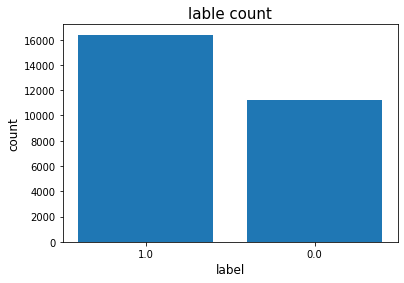

In [111]:
c_i_data = c_data.astype({"label":str})
label_count =  c_i_data["label"].value_counts().reset_index()
plt.title("lable count", fontsize=15)
plt.bar(label_count["index"], label_count["label"])
plt.ylabel("count", fontsize=12)
plt.xlabel("label", fontsize=12)
plt.show()

히스토그램 그릴 때 int면 눈금 이상해짐

<br> https://yganalyst.github.io/etc/visual_1/

# 4. 불용어 제거 및 차원 지정

In [112]:
x_data = c_data.contents
y_data = c_data.label.tolist()

In [113]:
y_data = list(map(int, y_data))

In [114]:
stopwords = []
with open('불용어사전.txt', mode='rt', encoding='utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        stopwords.append(word)

In [115]:
stopwords[0:5]

['어찌됐든', '그위에', '게다가', '점에서', '보아']

In [116]:
X_data = []
for sentence in x_data:
    temp_X = sentence.split() #문장 하나 가져오고 단어 단위로 쪼개기
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_data.append(temp_X)

In [117]:
len(c_data)

27639

In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [119]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

In [120]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10778
등장 빈도가 2번 이하인 희귀 단어의 수: 723
단어 집합에서 희귀 단어의 비율: 6.708109111152348
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.013299676255143947


In [121]:
vocab_size = total_cnt - rare_cnt + 1 # tokenizer 함수에 들어 갈 때 영향줘서 1 추가 해야 됨
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10056


In [122]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_data)
X_data = tokenizer.texts_to_sequences(X_data)

In [123]:
X_data[1]

[2451,
 2680,
 841,
 584,
 30,
 120,
 21,
 33,
 5816,
 21,
 73,
 142,
 301,
 662,
 37,
 968,
 120,
 73,
 192,
 37,
 33,
 614,
 602,
 761,
 430,
 4463,
 39,
 120,
 159,
 133,
 73,
 665,
 1003,
 113,
 114,
 761,
 2065,
 202,
 192,
 37,
 33,
 163,
 83,
 159,
 765,
 133,
 73,
 202,
 192,
 30,
 641,
 611,
 5088,
 176,
 1279,
 635,
 143,
 214,
 8,
 93,
 2041,
 181,
 1100,
 304,
 143,
 393,
 13,
 85,
 13,
 111,
 75,
 650,
 181,
 1100,
 46,
 143,
 87,
 808,
 2041,
 181,
 4464,
 15,
 174,
 304,
 181,
 1215,
 1553,
 1,
 63,
 197,
 508,
 371,
 408,
 156,
 186,
 2,
 103,
 2,
 10,
 9,
 49,
 205,
 14,
 64,
 38,
 757,
 38,
 1244,
 723,
 147,
 154,
 1044,
 1705,
 6,
 138,
 2,
 654,
 12,
 349,
 18,
 166,
 11,
 66,
 11,
 20,
 270,
 242]

문장 최대 길이 : 2492
문장의 평균 길이 : 313.07916350085026


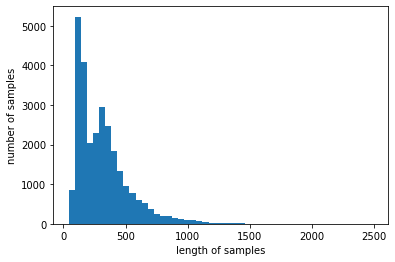

In [125]:
print('문장 최대 길이 :',max(len(l) for l in X_data))
print('문장의 평균 길이 :',sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
plt.close()

In [126]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 1750
below_threshold_len(max_len, X_data)

전체 샘플 중 길이가 1750 이하인 샘플의 비율: 99.97829154455661


In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_data = pad_sequences(X_data, maxlen = max_len)

# 5. LSTM 돌려보기

In [128]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3, random_state=777, stratify=y_data)
x_train.shape

(19347, 1750)

In [130]:
print(y_train.count(0),y_train.count(1))
print(y_test.count(0),y_test.count(1))

7871 11476
3373 4919


In [131]:
type(y_test)

list

In [132]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)

In [133]:
x_train.shape

(19347, 1750)

In [134]:
model = Sequential()
model.add(Embedding(vocab_size, 1700))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1700)        17095200  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               936448    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 18,031,777
Trainable params: 18,031,777
Non-trainable params: 0
_________________________________________________________________


In [135]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model_3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [136]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

loaded_model = load_model('best_model_3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/10
484/484 [==============================] - 216s 442ms/step - loss: 0.6805 - acc: 0.5658 - val_loss: 0.6712 - val_acc: 0.5920

Epoch 00001: val_acc improved from -inf to 0.59199, saving model to best_model_3.h5
Epoch 2/10
484/484 [==============================] - 215s 445ms/step - loss: 0.6678 - acc: 0.5963 - val_loss: 0.6725 - val_acc: 0.5886

Epoch 00002: val_acc did not improve from 0.59199
Epoch 3/10
484/484 [==============================] - 215s 443ms/step - loss: 0.6601 - acc: 0.6069 - val_loss: 0.6737 - val_acc: 0.5853

Epoch 00003: val_acc did not improve from 0.59199
Epoch 4/10
484/484 [==============================] - 219s 452ms/step - loss: 0.6519 - acc: 0.6165 - val_loss: 0.6764 - val_acc: 0.5894

Epoch 00004: val_acc did not improve from 0.59199
Epoch 5/10
484/484 [==============================] - 215s 444ms/step - loss: 0.6412 - acc: 0.6259 - val_loss: 0.6773 - val_acc: 0.5881

Epoch 00005: val_acc did not improve from 0.59199
Epoch 6/10
484/484 [===========

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


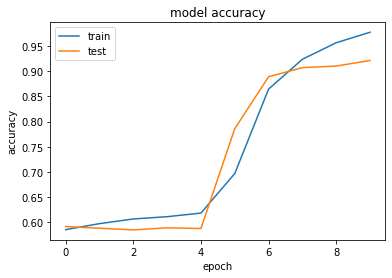

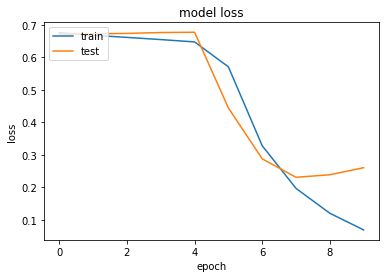

In [137]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model_3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

loaded_model = load_model('best_model_3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))